# Data Cleaning & Data Preprocessing

Data Cleaning and data preprocesssing are essential steps in the data science lifecycle. Real-world datasets are often incomplete, inconsistent , contain missing values, duplicates and incorrect formats.
The goal of this project is to improve data quality and make them suitable for analysis and machine learning models

## Dataset Overview
In this project, data cleaning and preprocessing are performed on multiple datasets.
The First dataset used in this project is the **Titanic dataset('titanic.csv')** 
The Titanic dataset includes the following columns:
1) PassengerId - Unique identifer for each passenger
2) Survived    - Survival status(0 = Not Survived, 1 = Survived)
3) Pclass      - Passenger class (1st, 2nd, 3rd)
4) Name	    - Name of the passenger
5) Sex	        - Gender of the passenger
6) Age         - Age of the passenger
7) SibSp	    - Number of siblings/spouses abroad
8) Parch	    - Number of parent/children abroad
9) Ticket	    - Ticket number assigned to the passenger
10) Fare	    - Ticket Fare paid by the passenger
11) Cabin	    - Cabin number where the passenger stayed
12) Embarked    - Port of embarkation(C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
import numpy as np
import pandas as pd

In [4]:
#load Titanic dataset into a DataFrame
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
#First 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Last 5 rows
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
#Display data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Statistical information
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#Count missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#Handling missing values
df['Age'].fillna(df['Age'].mean(), inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_12184\2047437812.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace = True)


In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#Handling missing values
df['Embarked'].fillna('Unknown', inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_12184\2721274383.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('Unknown', inplace = True)


In [13]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [14]:
#Drop columns that are not useful for analysis or modelling
df.drop(columns = ['Name', 'Cabin', 'Ticket'], inplace = True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [15]:
#One Hot Encoding
df = pd.get_dummies(df, drop_first = True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Embarked_Unknown
0,1,0,3,22.0,1,0,7.2500,True,False,True,False
1,2,1,1,38.0,1,0,71.2833,False,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True,False
3,4,1,1,35.0,1,0,53.1000,False,False,True,False
4,5,0,3,35.0,0,0,8.0500,True,False,True,False


In [16]:
df.value_counts()

PassengerId  Survived  Pclass  Age        SibSp  Parch  Fare    Sex_male  Embarked_Q  Embarked_S  Embarked_Unknown
1            0         3       22.000000  1      0      7.250   True      False       True        False               1
599          0         3       29.699118  0      0      7.225   True      False       False       False               1
588          1         1       60.000000  1      1      79.200  True      False       False       False               1
589          0         3       22.000000  0      0      8.050   True      False       True        False               1
590          0         3       29.699118  0      0      8.050   True      False       True        False               1
                                                                                                                     ..
301          1         3       29.699118  0      0      7.750   False     True        False       False               1
302          1         3       29.699118  2  

In [17]:
#DATA VISUALIZATION
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

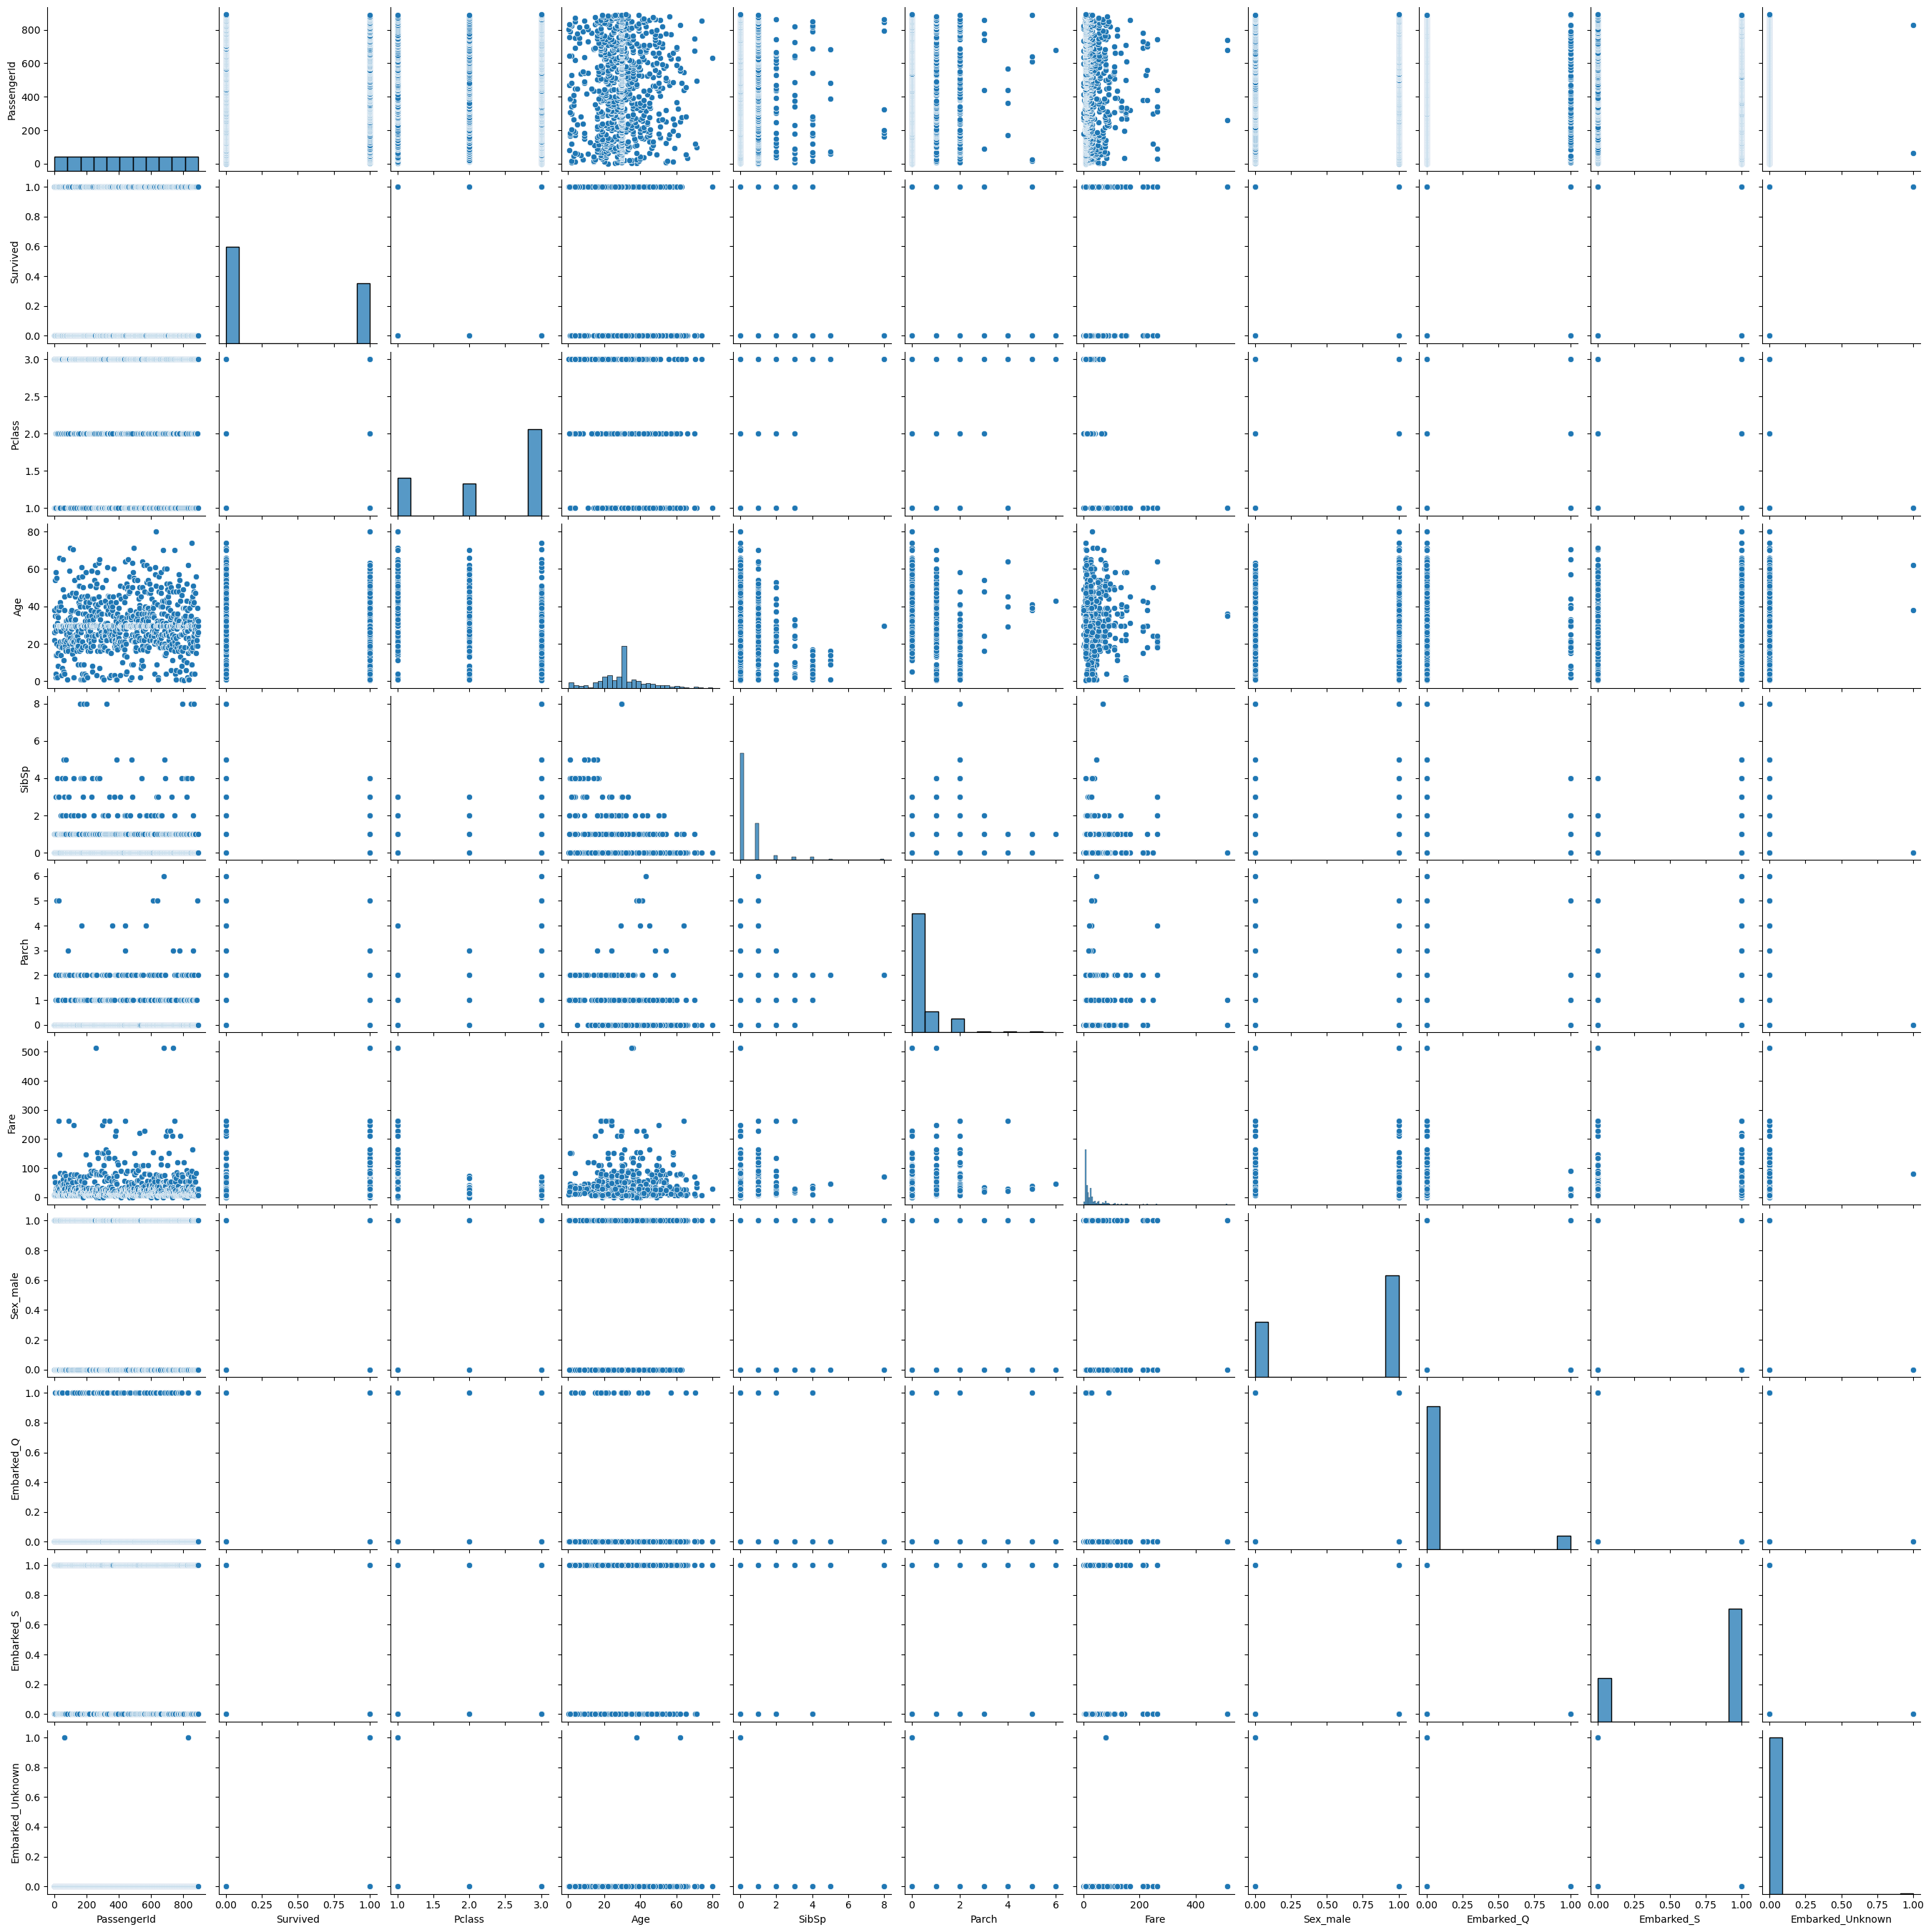

In [18]:
sns.pairplot(df)
plt.show()

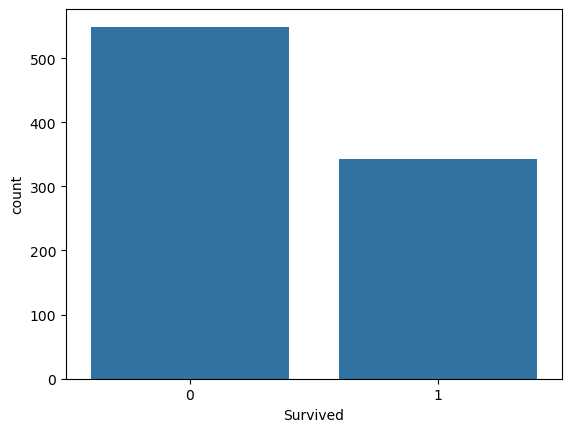

In [19]:
sns.countplot(x = 'Survived', data = df)
plt.show()

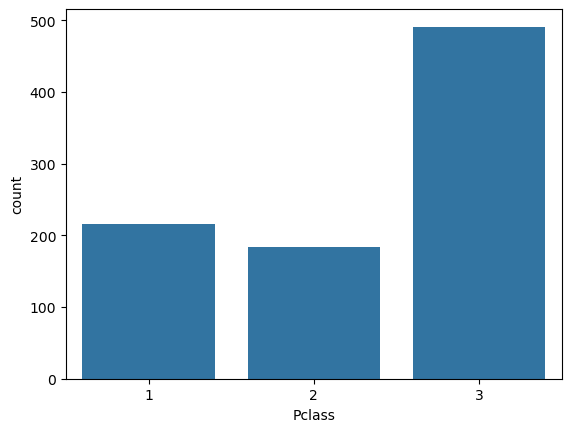

In [20]:
sns.countplot(x = 'Pclass', data = df)
plt.show()

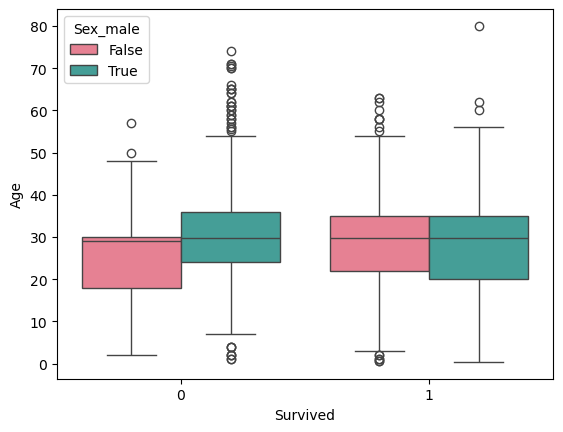

In [21]:
sns.boxplot(x = 'Survived', y = 'Age', data = df, hue = 'Sex_male', palette = 'husl')
plt.show()

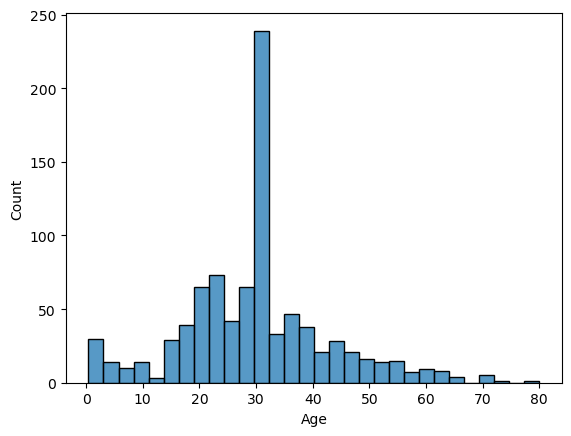

In [22]:
sns.histplot(df['Age'], bins = 30)
plt.show()

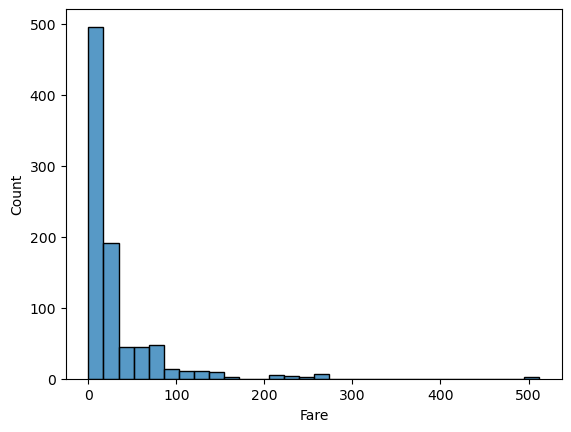

In [23]:
sns.histplot(df['Fare'], bins = 30)
plt.show()

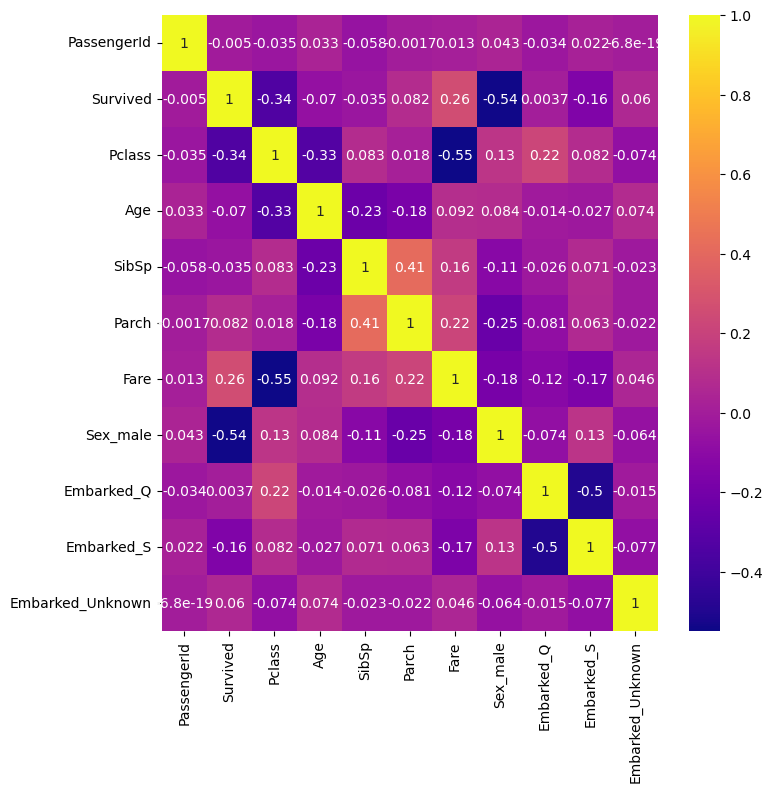

In [24]:
plt.figure(figsize = (8, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'plasma')
plt.show()

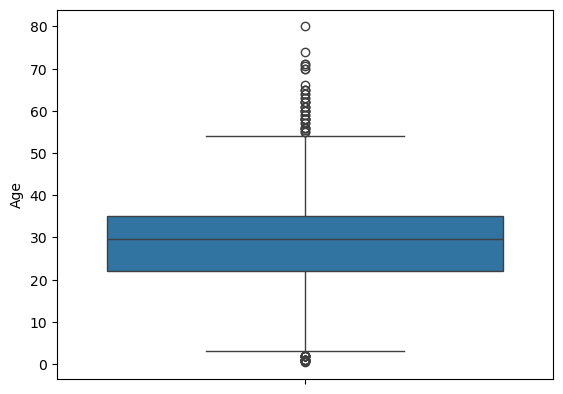

In [25]:
sns.boxplot(df['Age'])
plt.show()

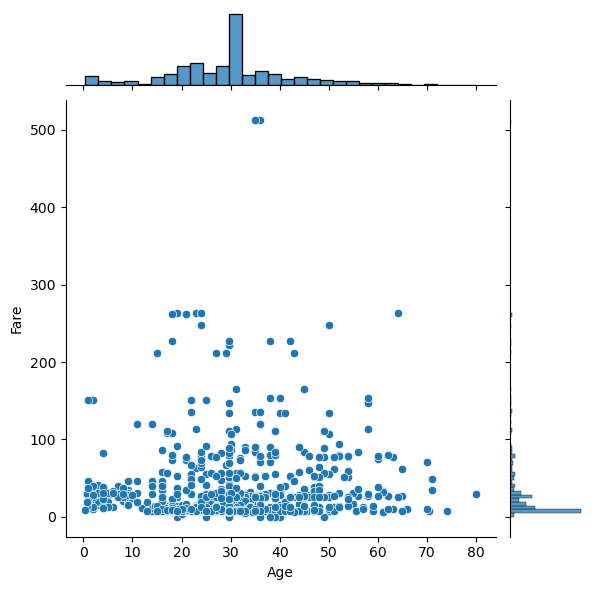

In [26]:
sns.jointplot(x = 'Age', y = 'Fare', data = df, kind = 'scatter')
plt.show()

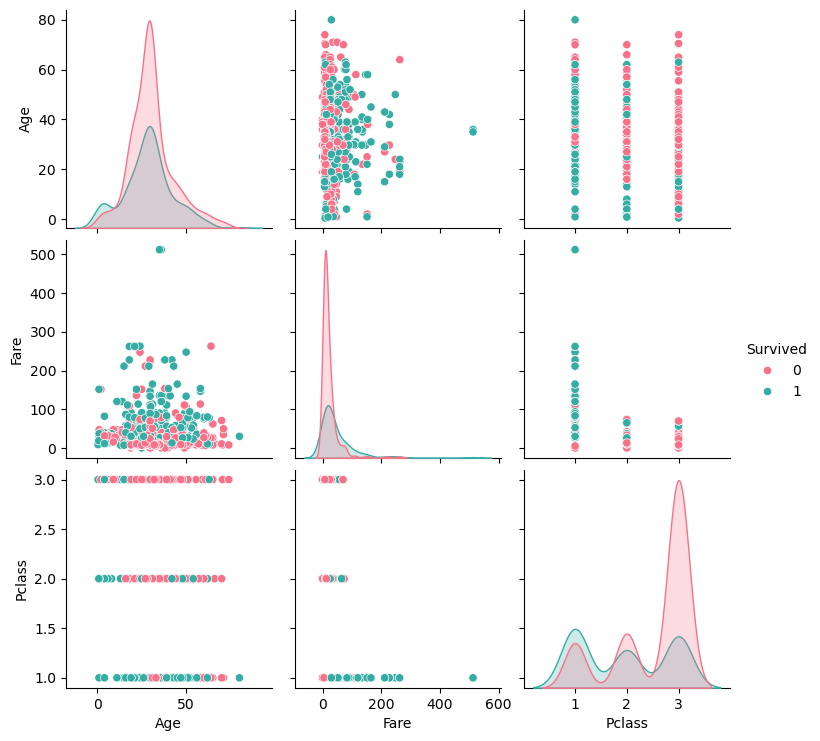

In [27]:
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue ='Survived', palette = 'husl')
plt.show()

The second dataset is 'Financial Sample.xlsx'. The second dataset contains the following columns:
1) Segment	
2) Country	
3) Product	
4) Discount Band	
5) Units Sold	
6) Manufacturing Price	
7) Sale Price	
8) Gross Sales	
9) Discounts	
10) Sales	
11) COGS	
12) Profit	
13) Date	
14) Month Number	
15) Month Name	
16) Year

In [29]:
df1 = pd.read_excel('Financial Sample.xlsx')
df1

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,NaN,1618.5,3,20,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014
1,Government,Germany,Carretera,NaN,1321.0,3,20,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,NaN,2178.0,3,15,32670.0,0.00,32670.00,21780.0,10890.00,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,NaN,888.0,3,15,13320.0,0.00,13320.00,8880.0,4440.00,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,NaN,2470.0,3,15,37050.0,0.00,37050.00,24700.0,12350.00,2014-06-01,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260,300,742500.0,111375.00,631125.00,618750.0,12375.00,2014-03-01,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260,300,163800.0,24570.00,139230.00,136500.0,2730.00,2014-10-01,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5,7,9576.0,1436.40,8139.60,6840.0,1299.60,2014-02-01,2,February,2014
698,Government,Canada,Paseo,High,723.0,10,7,5061.0,759.15,4301.85,3615.0,686.85,2014-04-01,4,April,2014


In [30]:
df1.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,NaN,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,NaN,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,NaN,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,NaN,888.0,3,15,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,NaN,2470.0,3,15,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6,June,2014


In [31]:
df1.tail()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
695,Small Business,France,Amarilla,High,2475.0,260,300,742500.0,111375.00,631125.00,618750.0,12375.00,2014-03-01,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260,300,163800.0,24570.00,139230.00,136500.0,2730.00,2014-10-01,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5,7,9576.0,1436.40,8139.60,6840.0,1299.60,2014-02-01,2,February,2014
698,Government,Canada,Paseo,High,723.0,10,7,5061.0,759.15,4301.85,3615.0,686.85,2014-04-01,4,April,2014
699,Channel Partners,United States of America,VTT,High,1806.0,250,12,21672.0,3250.80,18421.20,5418.0,13003.20,2014-05-01,5,May,2014


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        647 non-null    object        
 4   Units Sold           700 non-null    float64       
 5   Manufacturing Price  700 non-null    int64         
 6   Sale Price           700 non-null    int64         
 7   Gross Sales          700 non-null    float64       
 8   Discounts            700 non-null    float64       
 9    Sales               700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               700 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

In [33]:
df1.describe()

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Year
count,700.000000,700.000000,700.000000,7.000000e+02,700.000000,7.000000e+02,700.000000,700.000000,700,700.000000,700.000000
mean,1608.294286,96.477143,118.428571,1.827594e+05,13150.354629,1.696091e+05,145475.211429,24133.860371,2014-04-28 21:36:00,7.900000,2013.750000
min,200.000000,3.000000,7.000000,1.799000e+03,0.000000,1.655080e+03,918.000000,-40617.500000,2013-09-01 00:00:00,1.000000,2013.000000
25%,905.000000,5.000000,12.000000,1.739175e+04,800.320000,1.592800e+04,7490.000000,2805.960000,2013-12-24 06:00:00,5.750000,2013.750000
50%,1542.500000,10.000000,20.000000,3.798000e+04,2585.250000,3.554020e+04,22506.250000,9242.200000,2014-05-16 12:00:00,9.000000,2014.000000
75%,2229.125000,250.000000,300.000000,2.790250e+05,15956.343750,2.610775e+05,245607.500000,22662.000000,2014-09-08 12:00:00,10.250000,2014.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,2014-12-01 00:00:00,12.000000,2014.000000
std,867.427859,108.602612,136.775515,2.542623e+05,22962.928775,2.367263e+05,203865.506118,42760.626563,NaN,3.377321,0.433322


In [34]:
df1.isnull().sum()

Segment                 0
Country                 0
Product                 0
Discount Band          53
Units Sold              0
Manufacturing Price     0
Sale Price              0
Gross Sales             0
Discounts               0
 Sales                  0
COGS                    0
Profit                  0
Date                    0
Month Number            0
Month Name              0
Year                    0
dtype: int64

In [35]:
#FILL MISSING VALUES USING FORWARD FILL OR BACKWARD FILL
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Date'].fillna(method = 'ffill', inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_12184\3618350364.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Date'].fillna(method = 'ffill', inplace = True)
C:\Users\User\AppData\Local\Temp\ipykernel_12184\3618350364.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1['Date'].fillna(method = 'ffill', inplace = True)


In [36]:
df1.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       ' Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [37]:
df1['Discount Band'].fillna('Unknown', inplace = True)
df1.head()

C:\Users\User\AppData\Local\Temp\ipykernel_12184\4158952354.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Discount Band'].fillna('Unknown', inplace = True)


,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,Unknown,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,Unknown,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,Unknown,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,Unknown,888.0,3,15,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,Unknown,2470.0,3,15,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6,June,2014


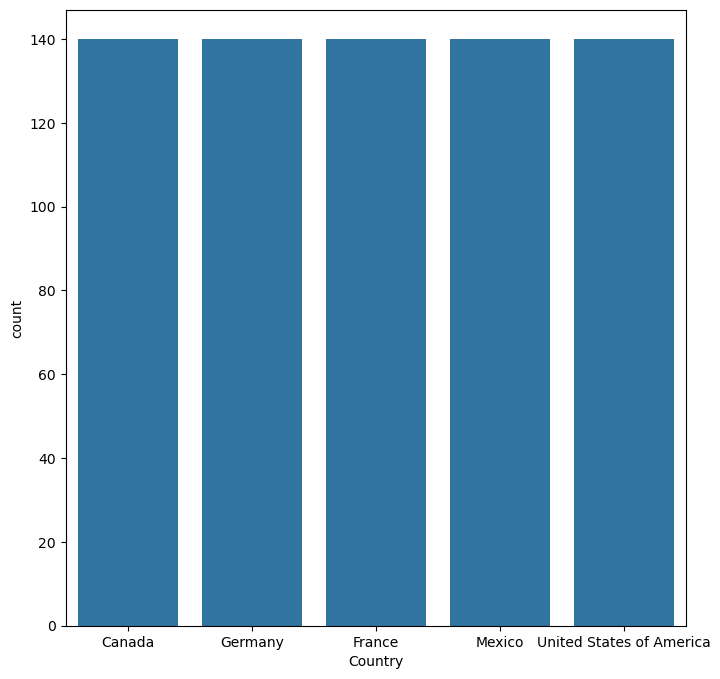

In [38]:
plt.figure(figsize = (8, 8))
sns.countplot(x = 'Country', data = df1)
plt.show()

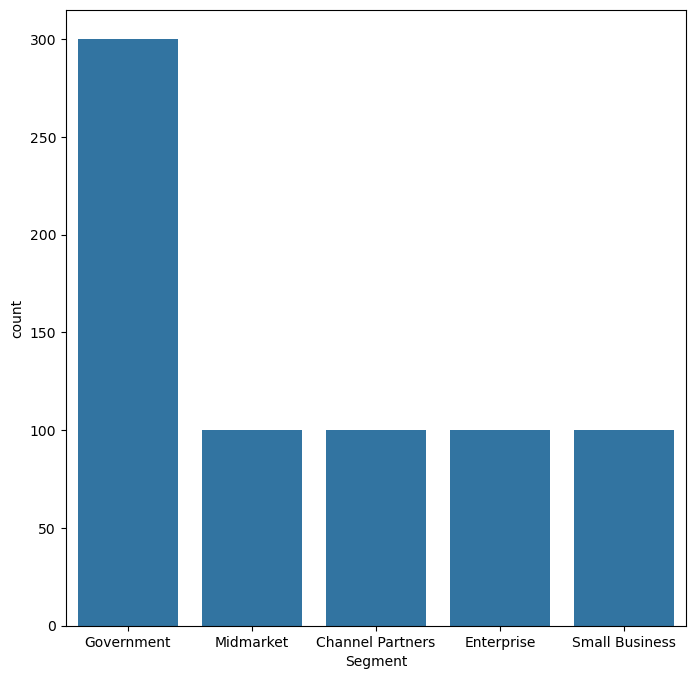

In [39]:
plt.figure(figsize = (8,8))
sns.countplot(x = 'Segment', data = df1)
plt.show()

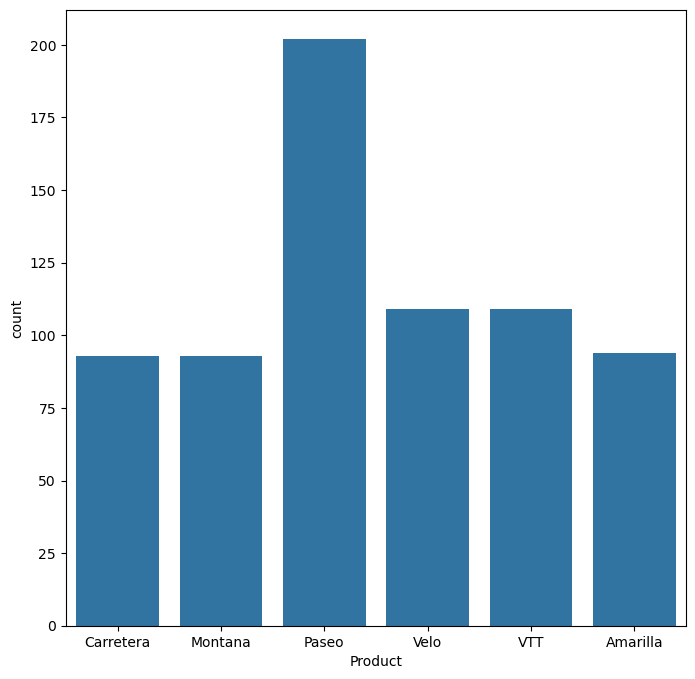

In [40]:
plt.figure(figsize = (8, 8))
sns.countplot(x = 'Product', data = df1)
plt.show()

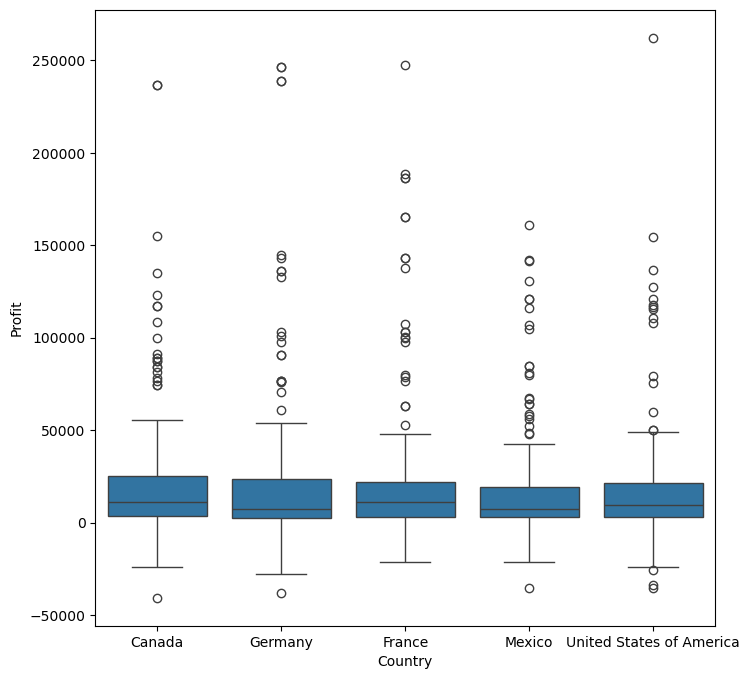

In [41]:
plt.figure(figsize = (8,8))
sns.boxplot(x = 'Country', y = 'Profit', data = df1)
plt.show()

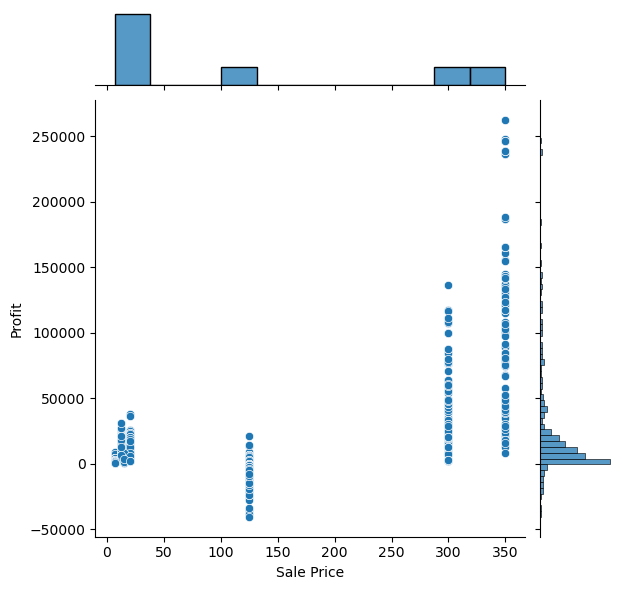

In [42]:
sns.jointplot(x = 'Sale Price', y = 'Profit', data = df1, kind = 'scatter')
plt.show()

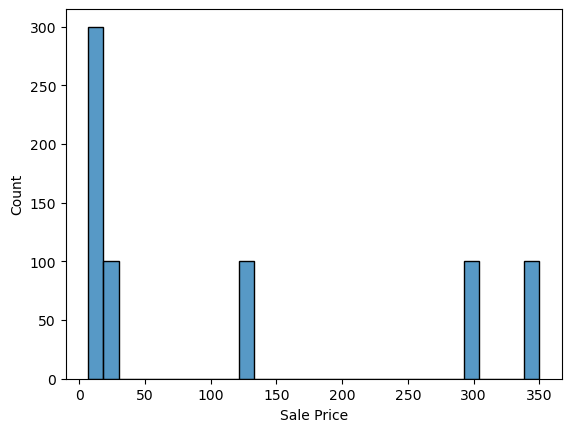

In [43]:
sns.histplot(df1['Sale Price'], bins = 30)
plt.show()

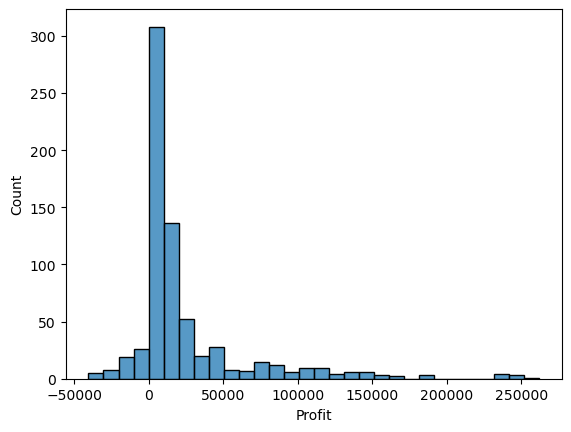

In [44]:
sns.histplot(df1['Profit'], bins = 30)
plt.show()

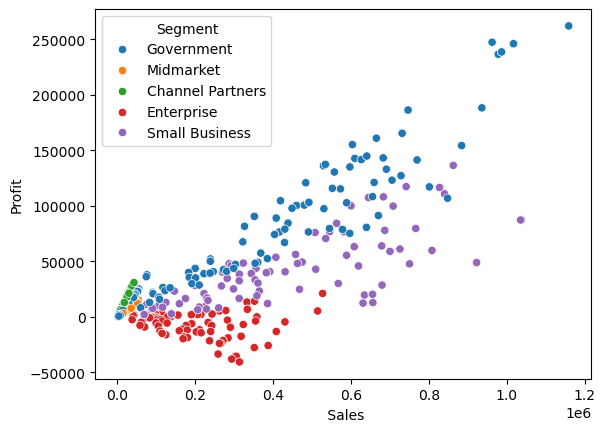

In [45]:
sns.scatterplot(x = ' Sales', y = 'Profit', data = df1, hue = 'Segment')
plt.show()

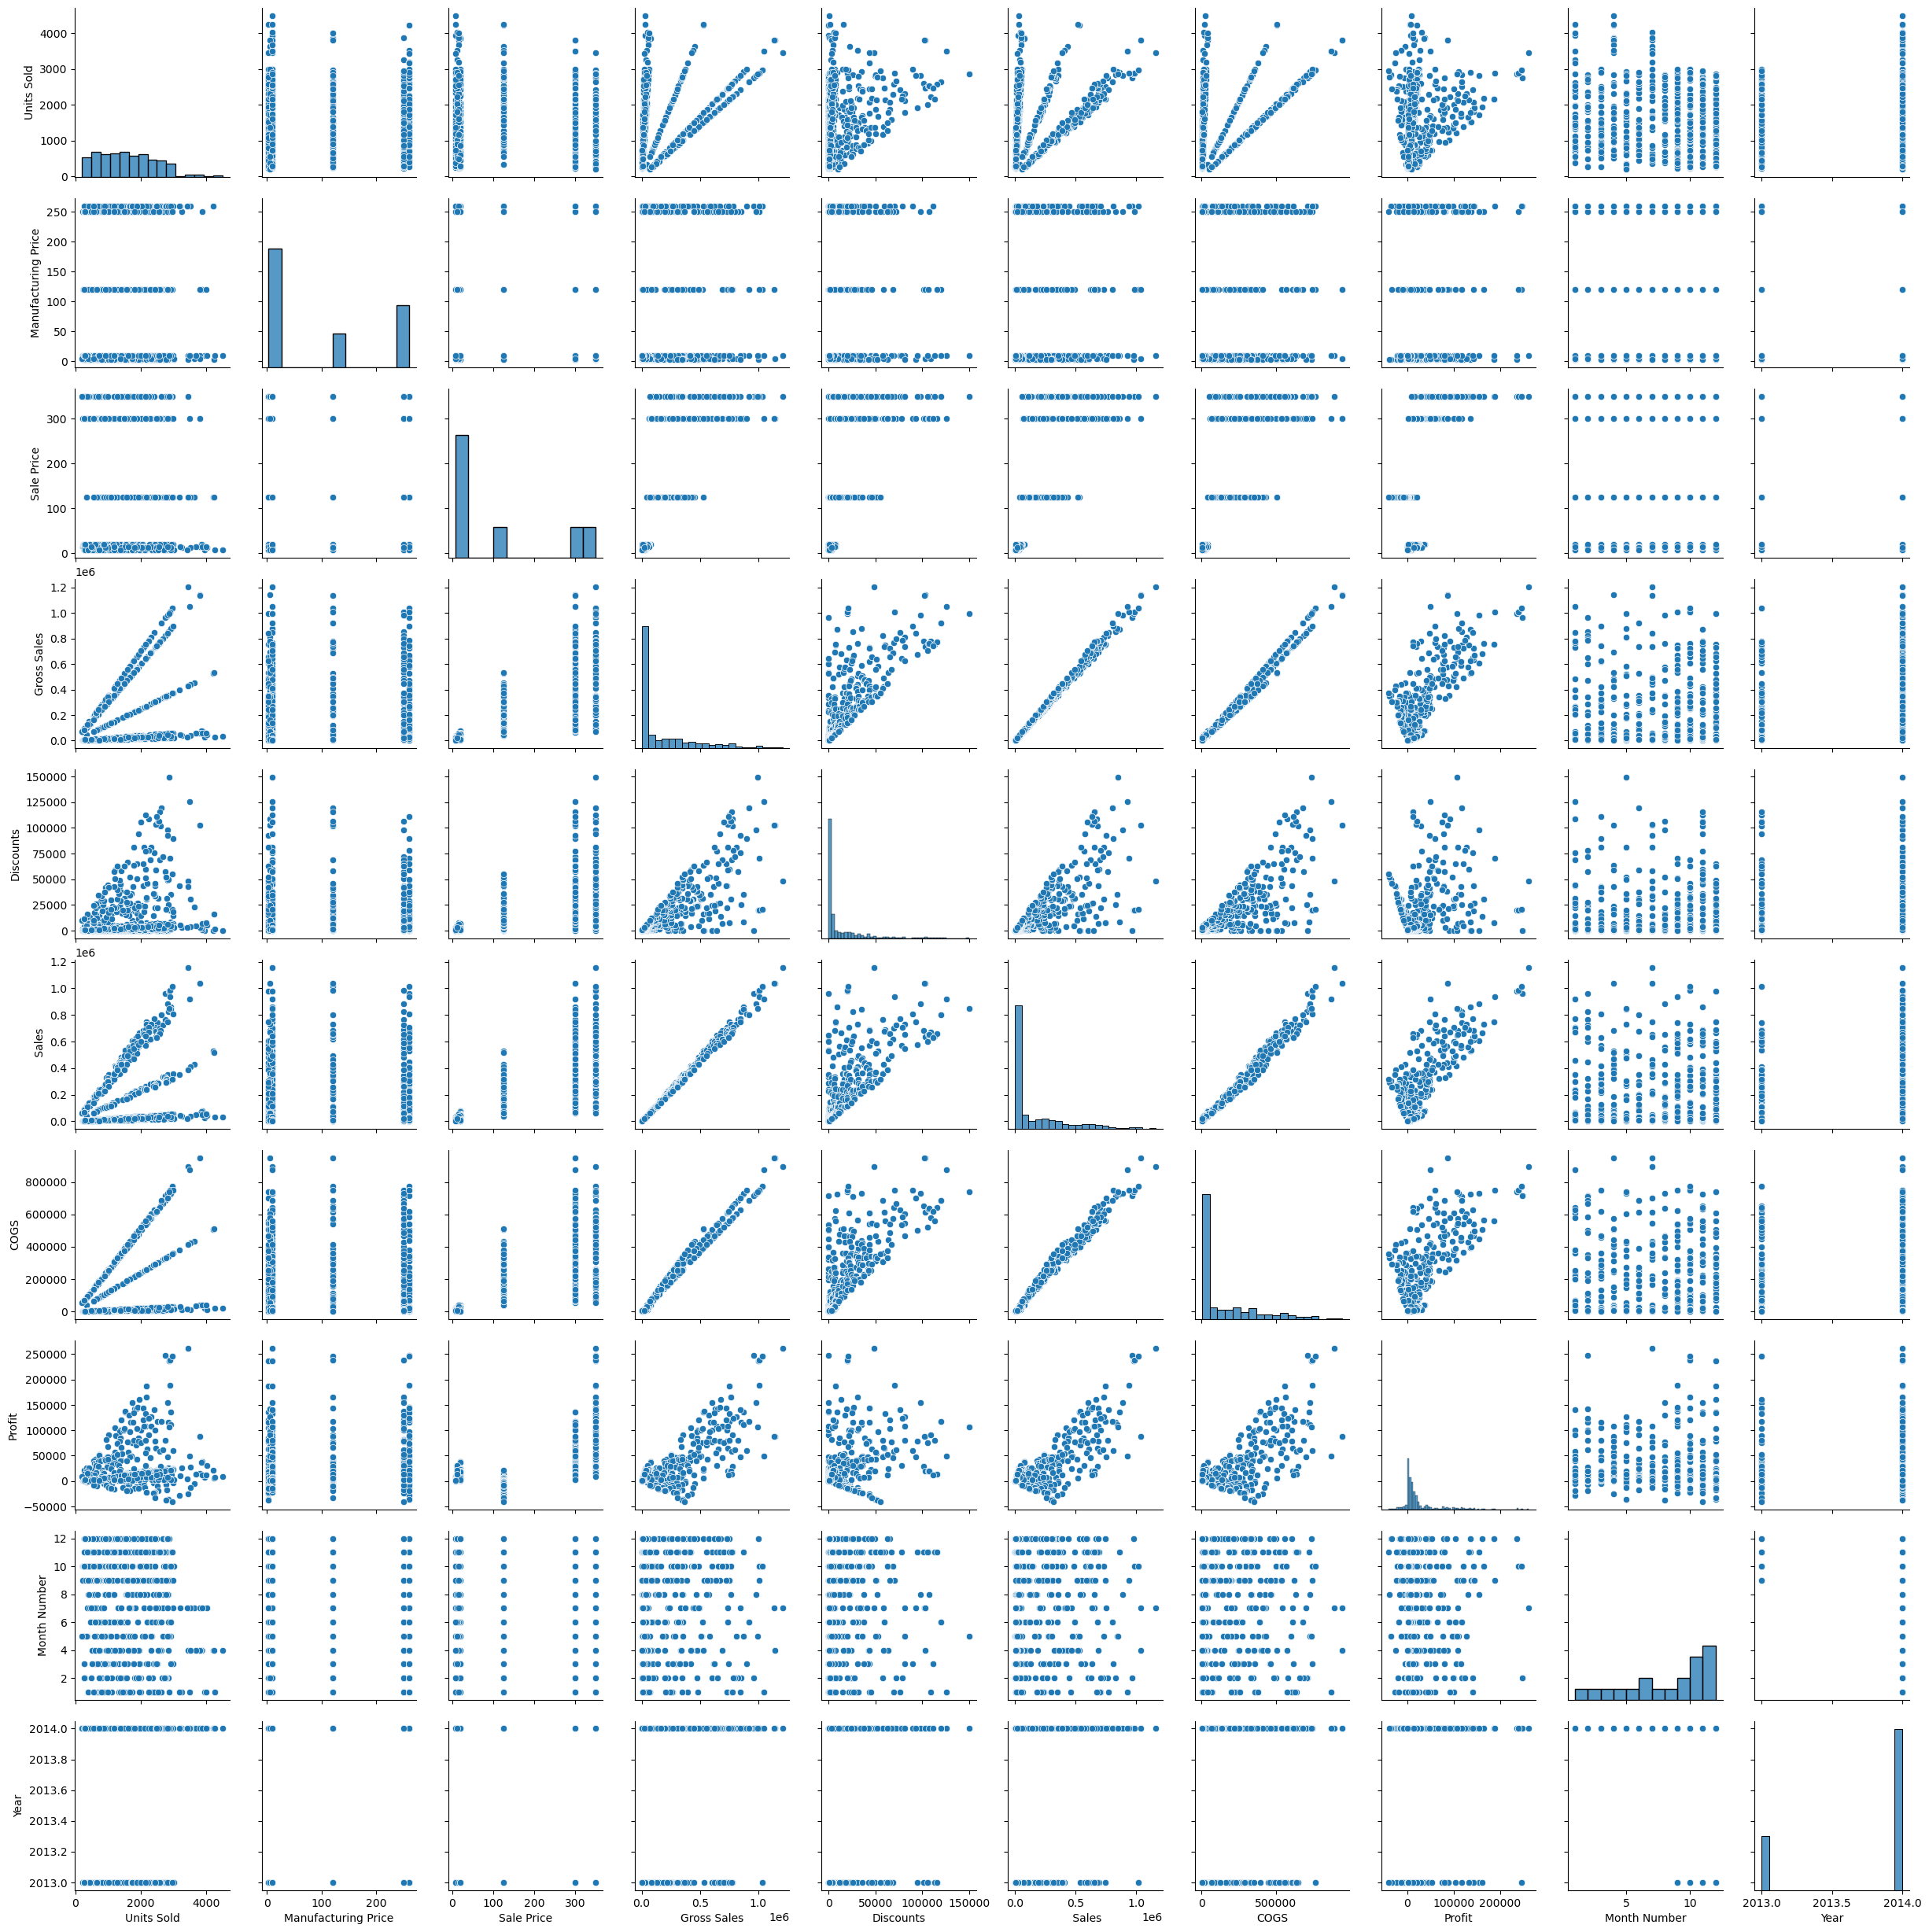

In [46]:
sns.pairplot(df1)
plt.show()

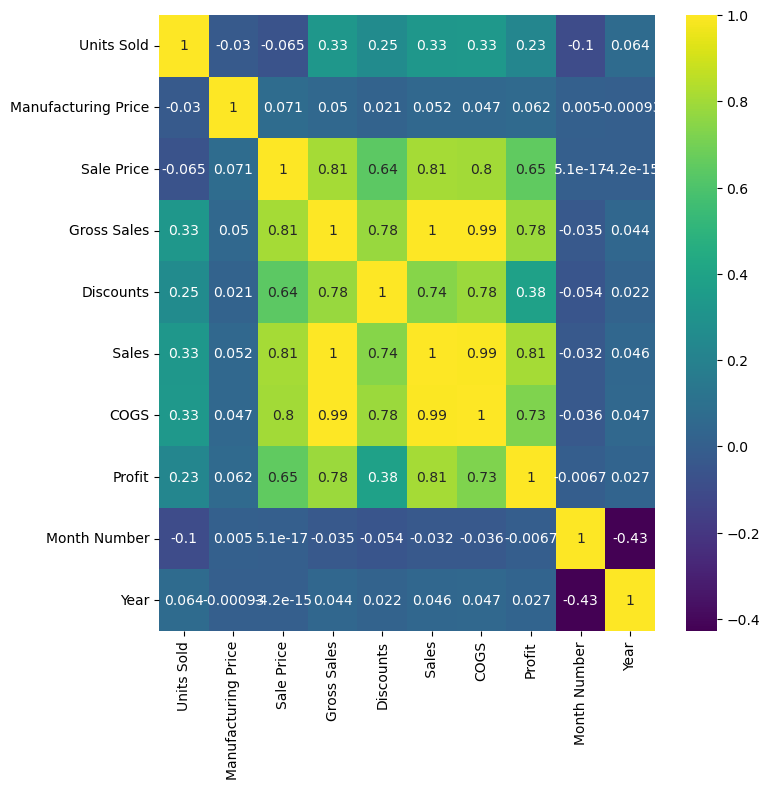

In [47]:
plt.figure(figsize = (8, 8))
sns.heatmap(df1.corr(numeric_only = True), annot = True, cmap = 'viridis')
plt.show()

In [48]:
df1 = pd.get_dummies(df1, drop_first = True)
df1.head()

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,...,Month Name_December,Month Name_February,Month Name_January,Month Name_July,Month Name_June,Month Name_March,Month Name_May,Month Name_November,Month Name_October,Month Name_September
0,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,...,False,False,True,False,False,False,False,False,False,False
1,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,...,False,False,True,False,False,False,False,False,False,False
2,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,...,False,False,False,False,True,False,False,False,False,False
3,888.0,3,15,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6,...,False,False,False,False,True,False,False,False,False,False
4,2470.0,3,15,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6,...,False,False,False,False,True,False,False,False,False,False
